In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import numpy as np
from scipy import stats
def mean_confidence_interval(data, confidence=0.95): # from https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy
    a = 1.0*np.array(data)
    n = len(a)
    is_not_zero = False
    for i in a:
        if i != 0:
            is_not_zero = True
    if not is_not_zero:
        return 0, 0, 0
    mean, sigma = a.mean(), a.std()
    interval = stats.norm.interval(confidence, loc=mean, scale=sigma/np.sqrt(n))
    return mean, interval[0], interval[1]

def getAveragePoints(data, sizeOfInterval = 100):
    new = [np.array([]), np.array([])]
    upper = [np.array([]), np.array([])]
    lower = [np.array([]), np.array([])]
    sumUp = [np.array([]), np.array([])]

    for i in range(data.shape[1]) :
        if i < sizeOfInterval:
            sumUp[0] = np.append(sumUp[0], data[0][i])
            sumUp[1] = np.append(sumUp[1], data[1][i])
        else:
            sumUp[0][i%(sizeOfInterval)] = data[0][i]
            sumUp[1][i%(sizeOfInterval)] = data[1][i]

        if i >= sizeOfInterval:
            xMean, xLower, xUpper = mean_confidence_interval(sumUp[0])
            yMean, yLower, yUpper = mean_confidence_interval(sumUp[1])
            new[0] = np.append(new[0],xMean)
            new[1] = np.append(new[1],yMean)
            lower[0] = np.append(lower[0],xMean)
            lower[1] = np.append(lower[1],yLower)
            upper[0] = np.append(upper[0],xMean)
            upper[1] = np.append(upper[1],yUpper)

    return new, lower, upper

novelty: classic, Train V with crit transitions
Alien
6943.4


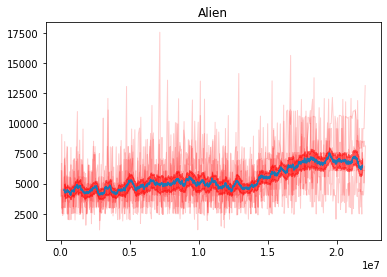

Amidar
2118.32


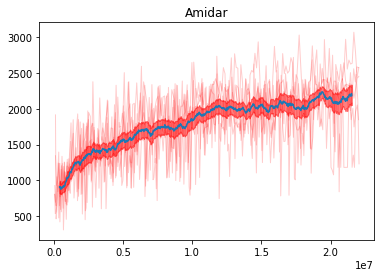

Assault
3079.92


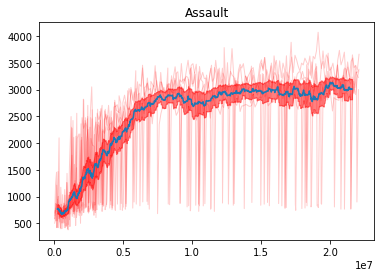

Asterix
48226.0


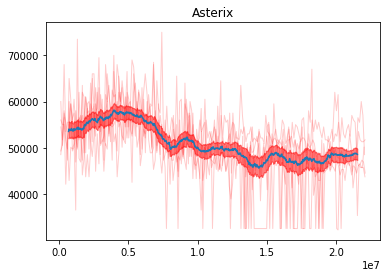

Asteroids
9152.8


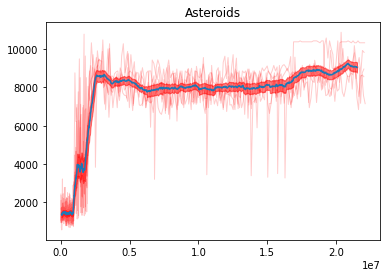

Atlantis
119636.0


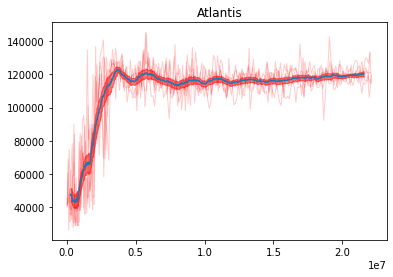

BankHeist
709.0


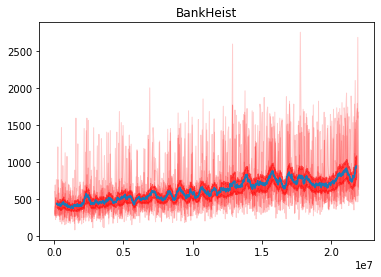

BattleZone
153880.0


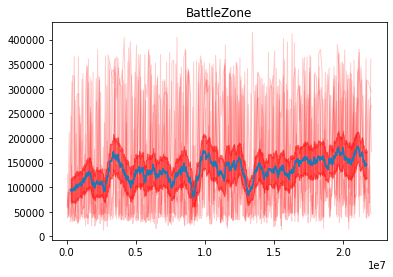

BeamRider
3560.88


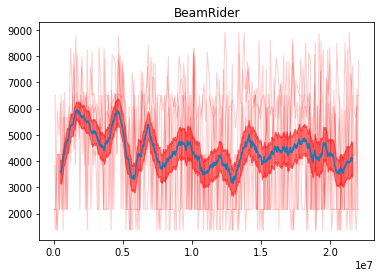

Berzerk
4120.6


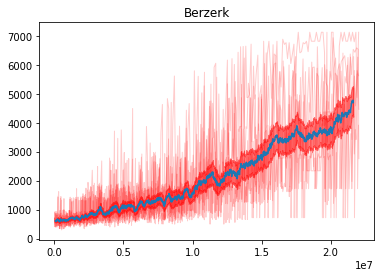

Bowling
103.24


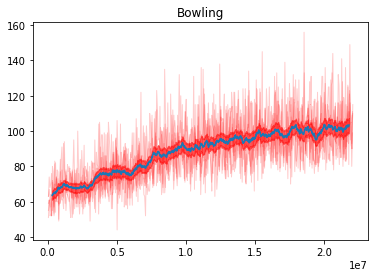

Boxing
86.4


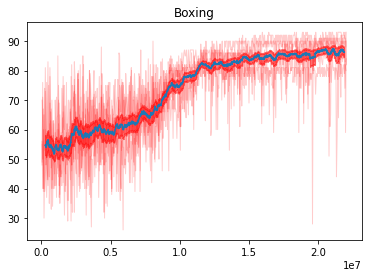

Breakout
302.04


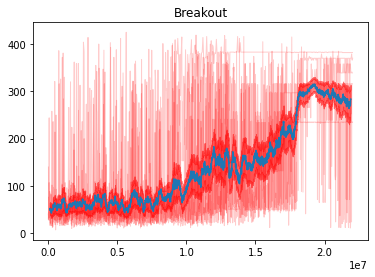

Centipede
62654.16


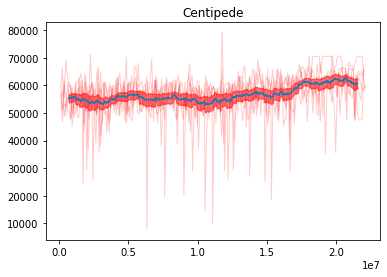

ChopperCommand
3786.0


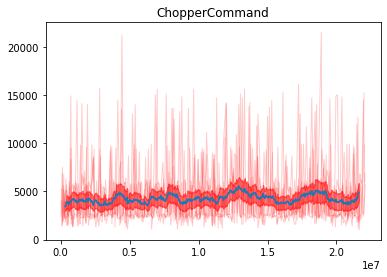

CrazyClimber
91912.0


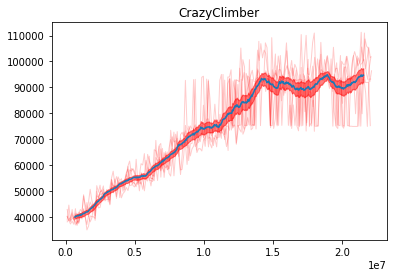

DemonAttack
10876.0


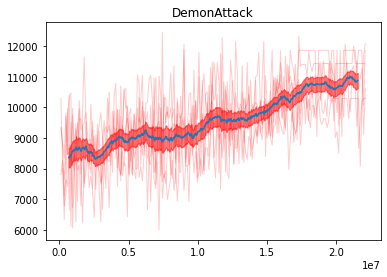

DoubleDunk
23.96


/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


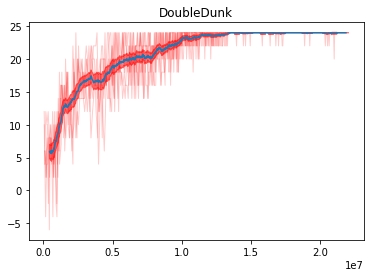

Enduro
220.28


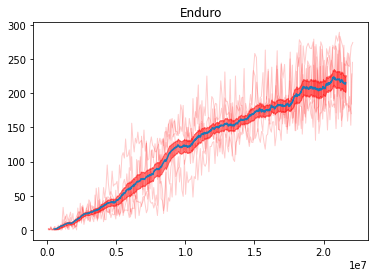

FishingDerby
-7.62


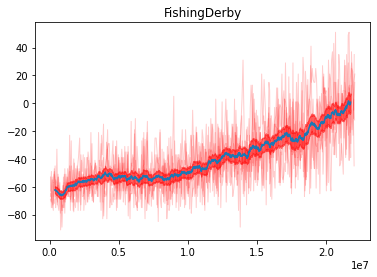

Freeway
28.96


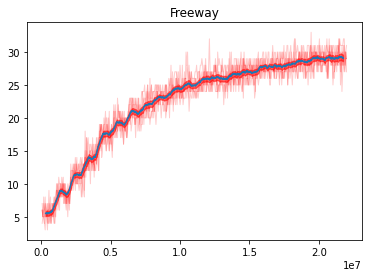

Frostbite
6508.0


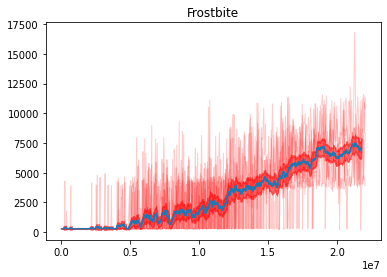

Gopher
12539.6


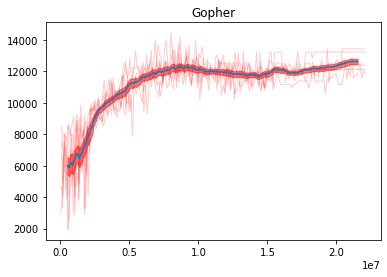

Gravitar
2284.0


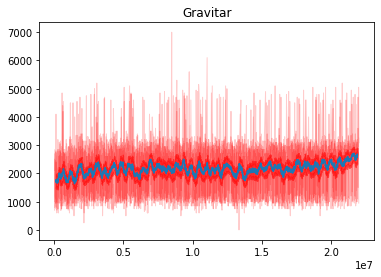

Hero
36099.8


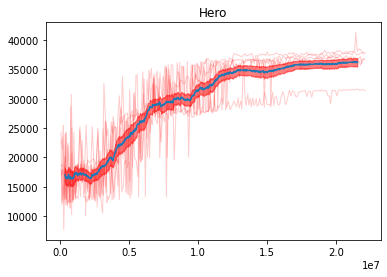

IceHockey
26.96


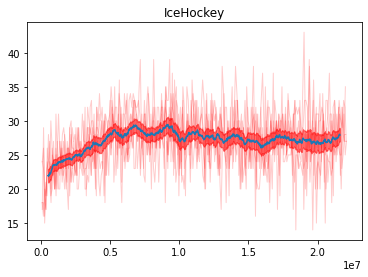

Jamesbond
18790.0


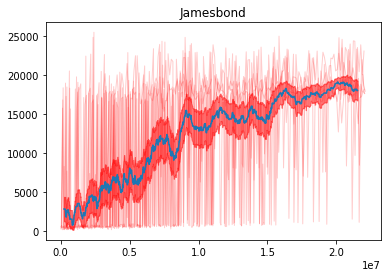

Kangaroo
9202.0


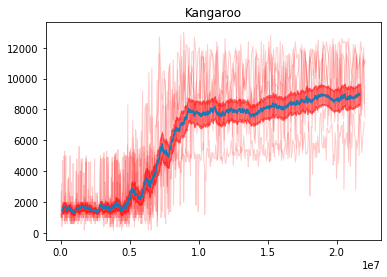

Krull
4422.88


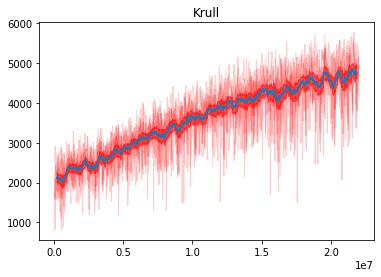

KungFuMaster
42388.0


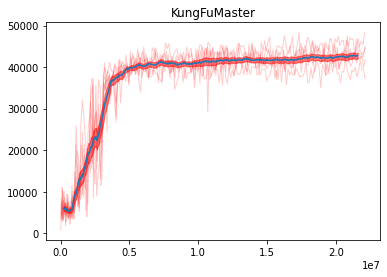

MontezumaRevenge
0.0


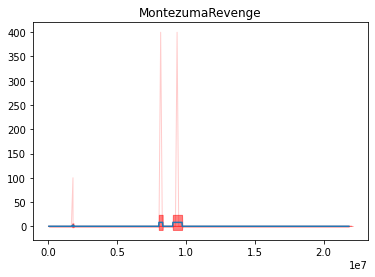

MsPacman
18285.18


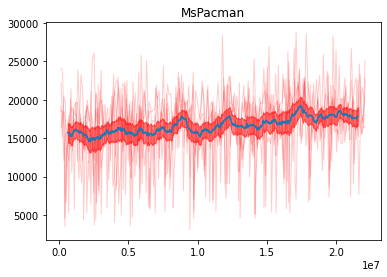

NameThisGame
8339.4


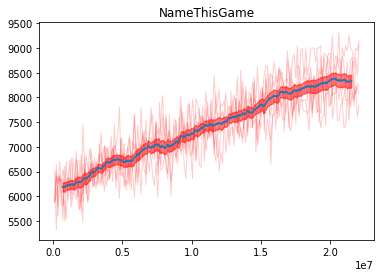

Phoenix
8777.4


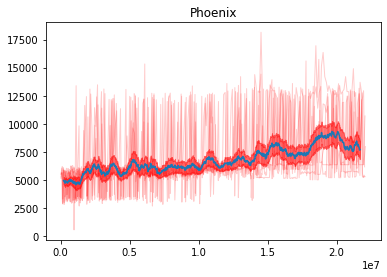

Pitfall
-0.42


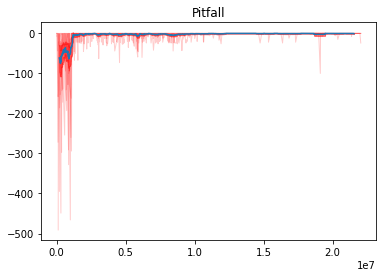

Pong
10.94


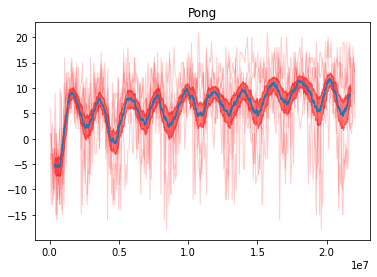

PrivateEye
100.0


/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


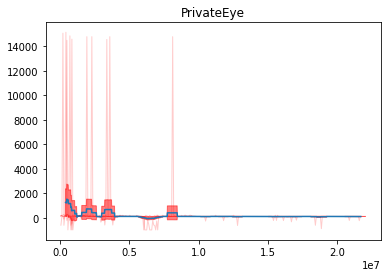

Qbert
30618.5


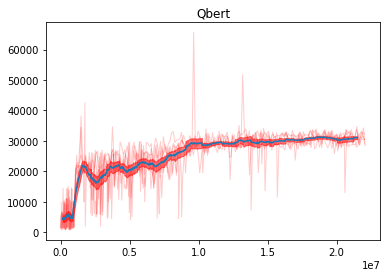

Riverraid
22111.2


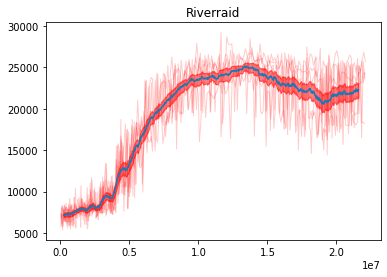

RoadRunner
57212.0


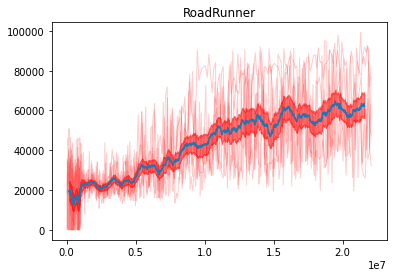

Robotank
36.16


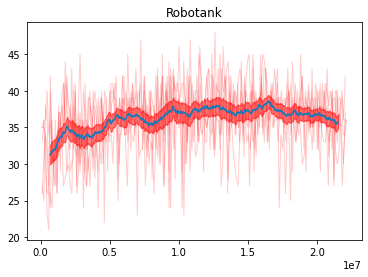

Seaquest
3922.8


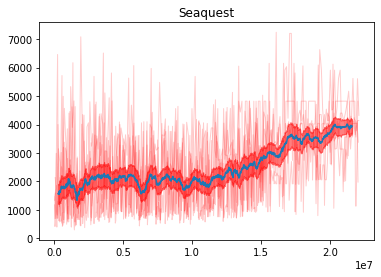

Skiing
-20041.24


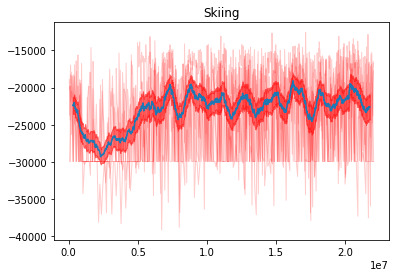

Solaris
4704.0


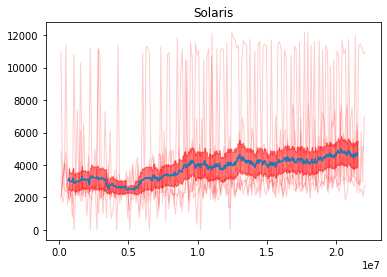

SpaceInvaders
4289.4


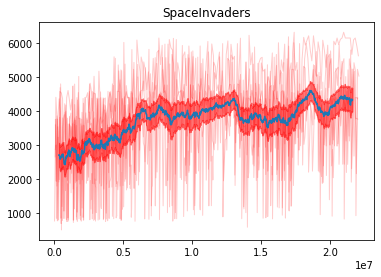

StarGunner
20320.0


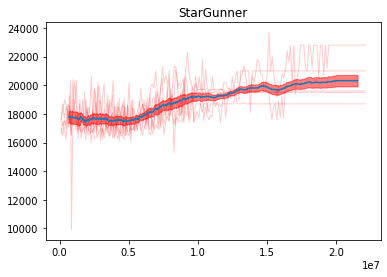

Tennis
0.0


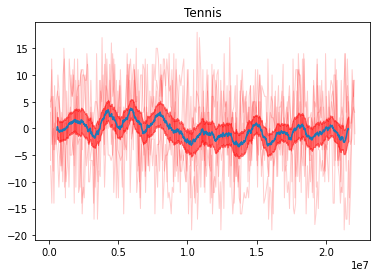

TimePilot
24150.0


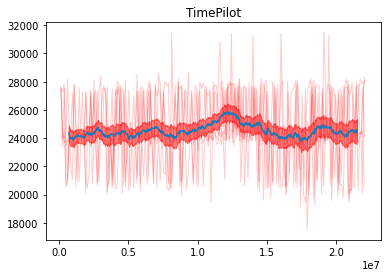

Tutankham
203.54


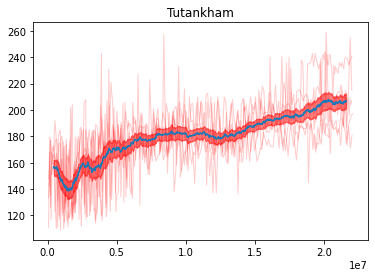

UpNDown
58867.2


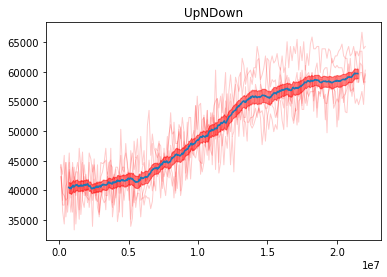

Venture
1564.0


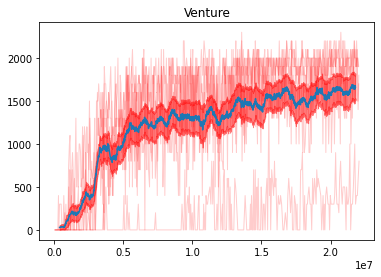

VideoPinball
139799.22


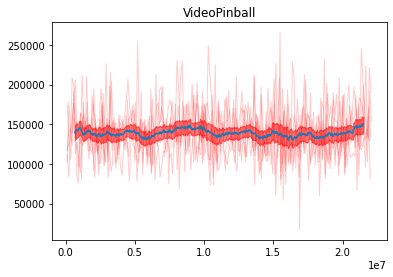

WizardOfWor
43436.0


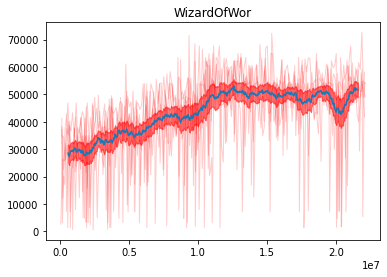

YarsRevenge
135089.68


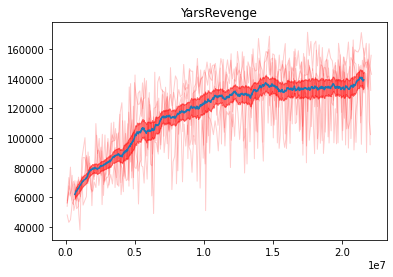

Zaxxon
30818.0


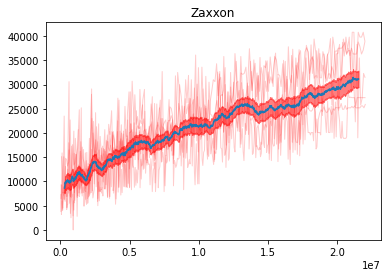

ave time 1.2813661202638305
novelty: depth, Train V with crit transitions
Alien
7640.6


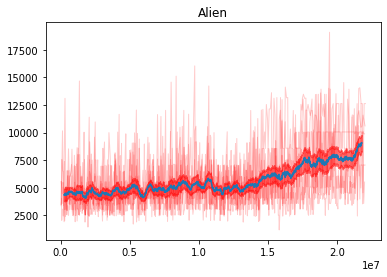

Amidar
2404.6


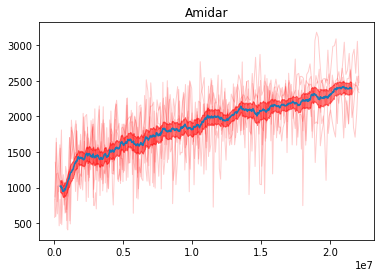

Assault
3185.44


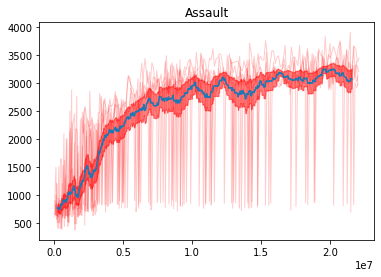

Asterix
48364.0


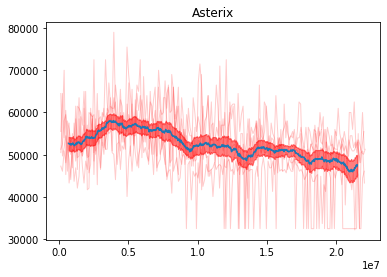

Asteroids
9000.8


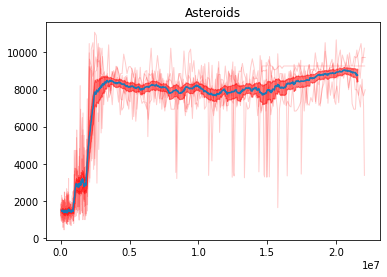

Atlantis
120650.0


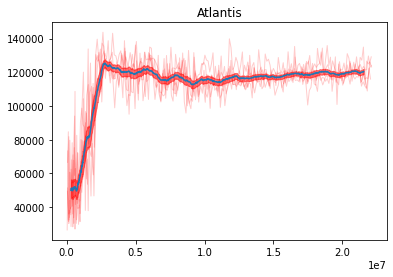

BankHeist
957.12


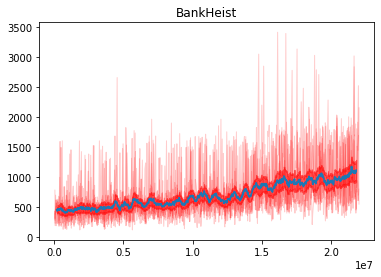

BattleZone
165340.0


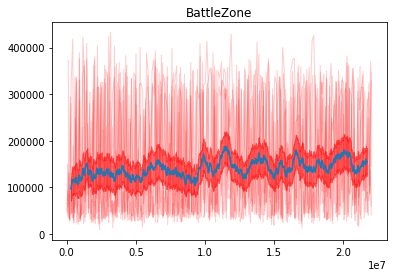

BeamRider
3743.8


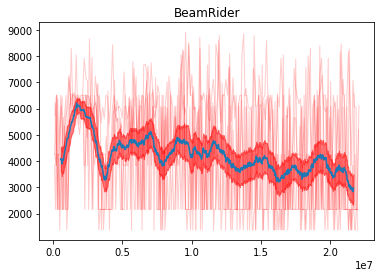

Berzerk
4642.2


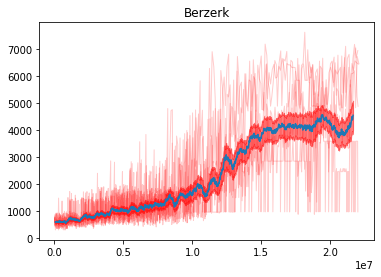

Bowling
101.4


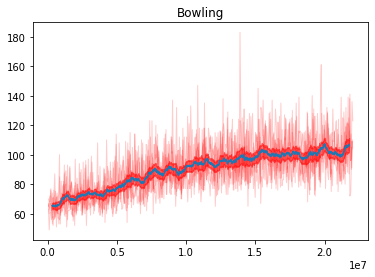

Boxing
84.3


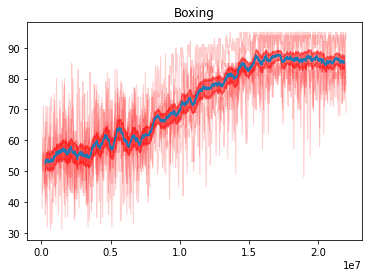

Breakout
320.64


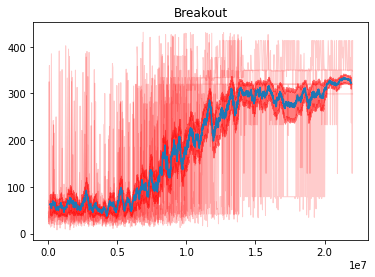

Centipede
60157.38


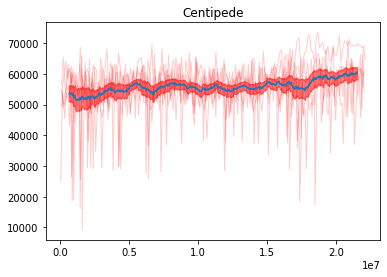

ChopperCommand
4570.0


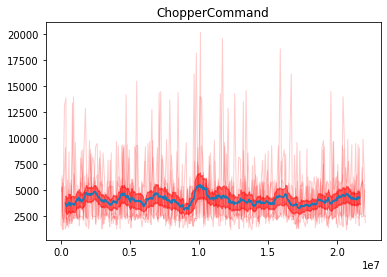

CrazyClimber
90332.0


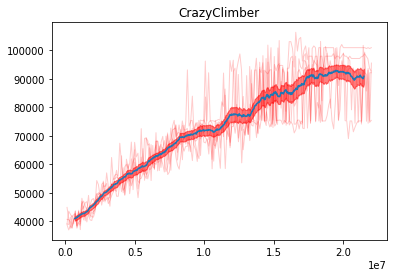

DemonAttack
10829.9


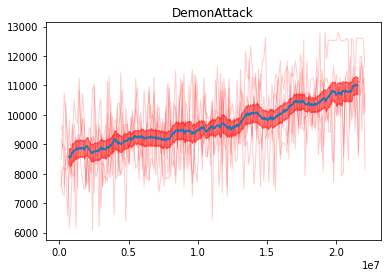

DoubleDunk
23.76


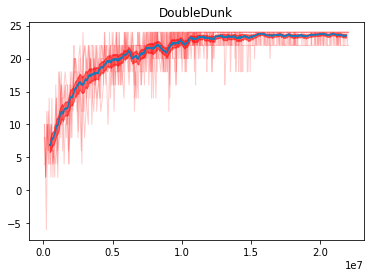

Enduro
250.88


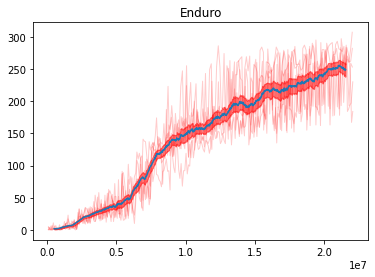

FishingDerby
-29.22


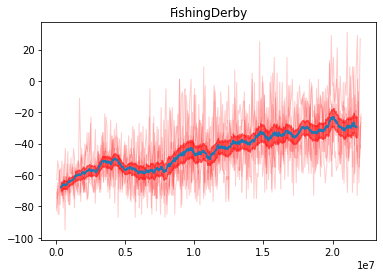

Freeway
29.02


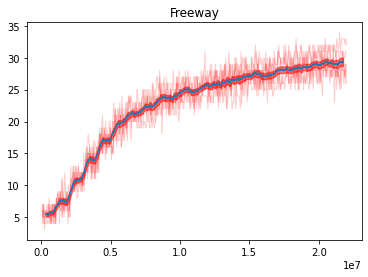

Frostbite
5255.6


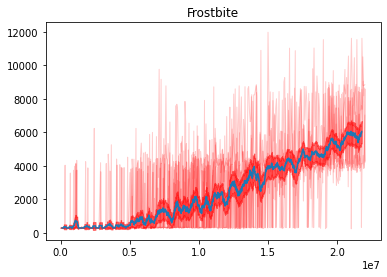

Gopher
13326.4


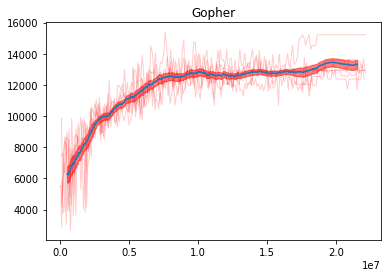

Gravitar
2246.0


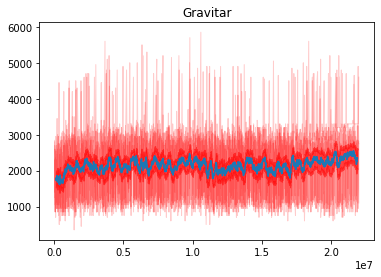

Hero
34083.4


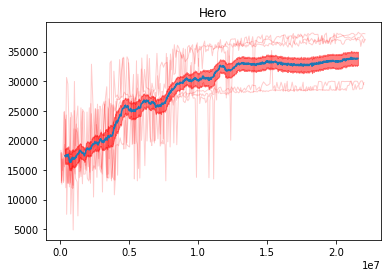

IceHockey
29.58


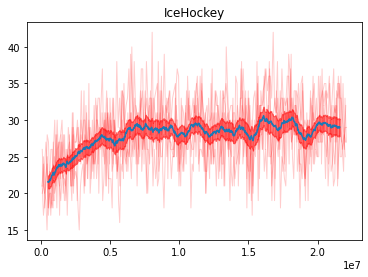

Jamesbond
17572.0


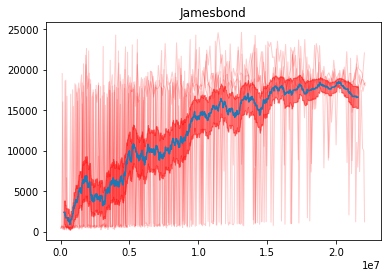

Kangaroo
9222.0


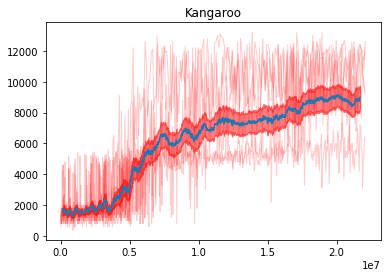

Krull
4900.9


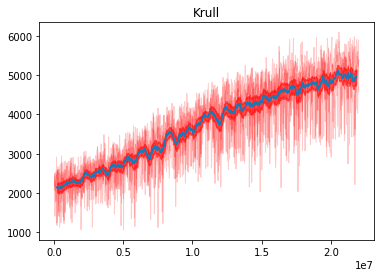

KungFuMaster
43520.0


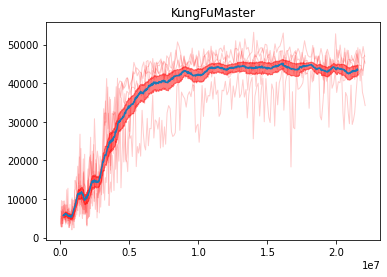

MontezumaRevenge
0.0


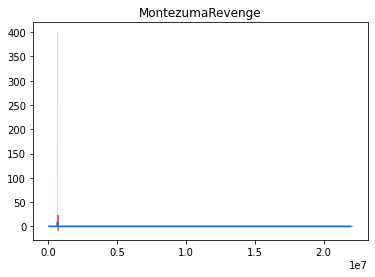

MsPacman
16150.08


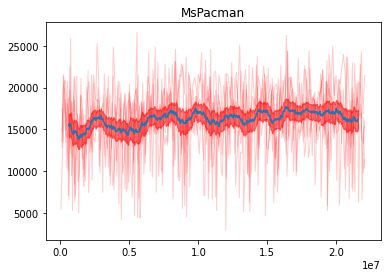

NameThisGame
8017.2


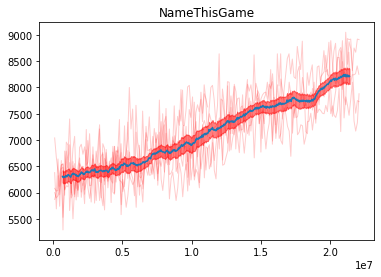

Phoenix
8033.4


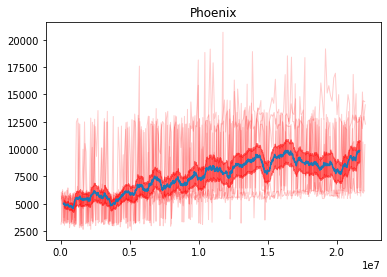

Pitfall
-1.68


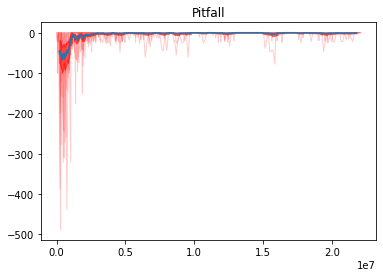

Pong
6.18


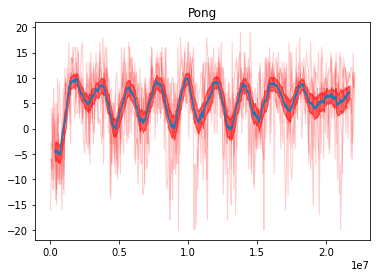

PrivateEye
120.0


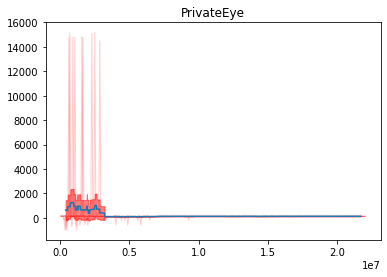

Qbert
31625.5


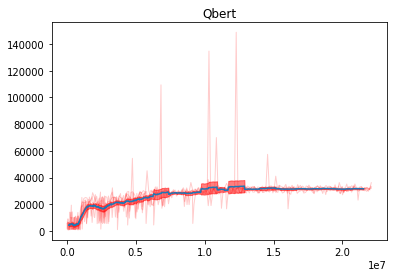

Riverraid
21367.4


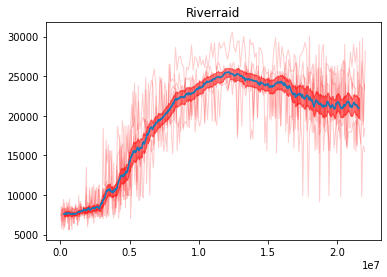

RoadRunner
49828.0


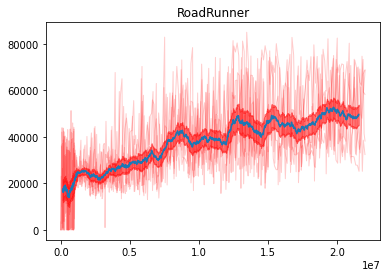

Robotank
37.94


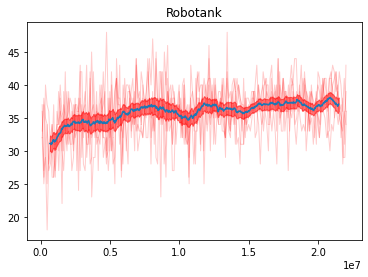

Seaquest
2878.6


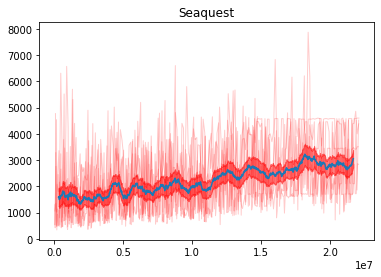

Skiing
-29080.3


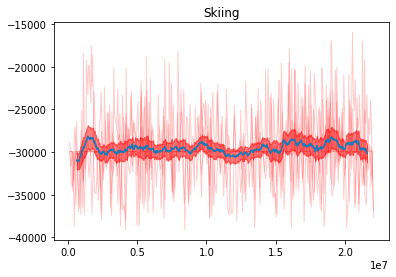

Solaris
3106.4


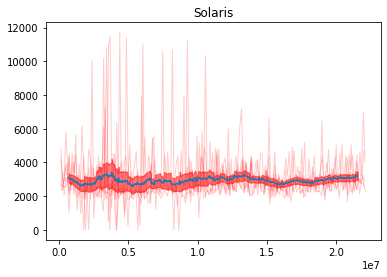

SpaceInvaders
3680.4


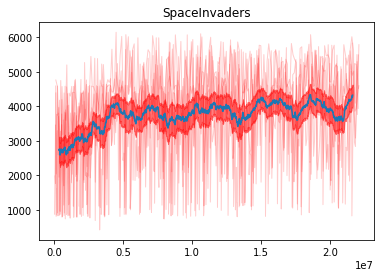

StarGunner
20700.0


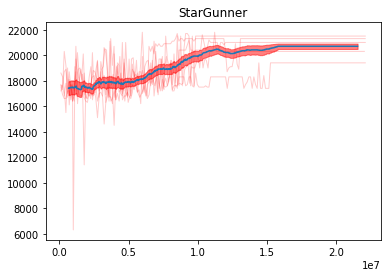

Tennis
1.24


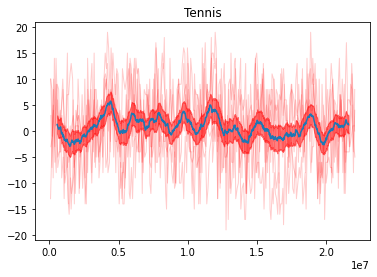

TimePilot
24950.0


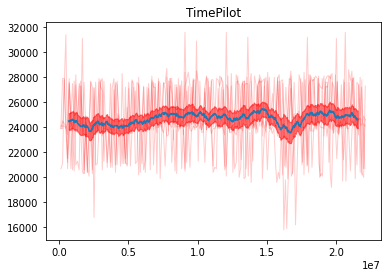

Tutankham
181.48


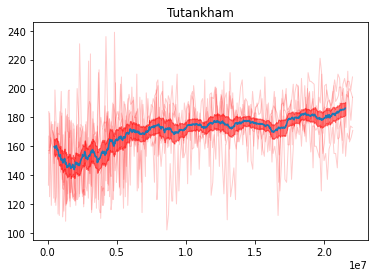

UpNDown
58783.0


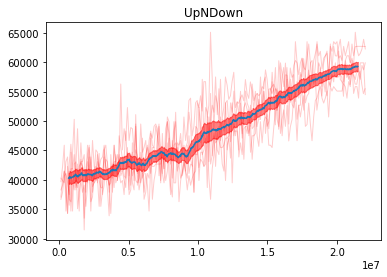

Venture
1466.0


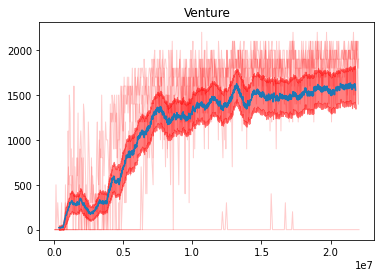

VideoPinball
134489.58


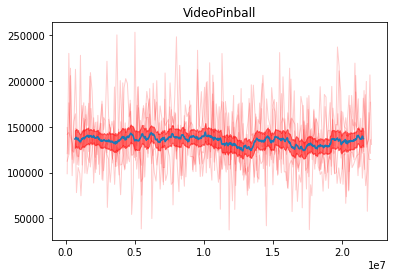

WizardOfWor
43556.0


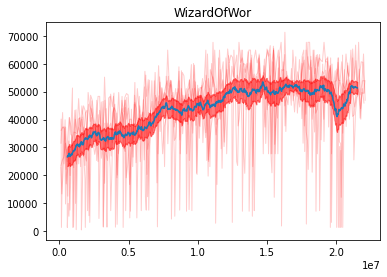

YarsRevenge
142568.26


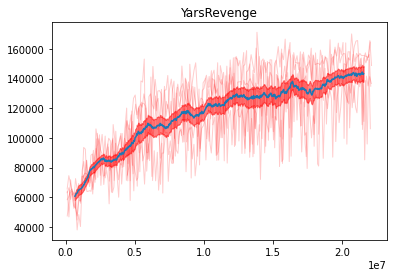

Zaxxon
33268.0


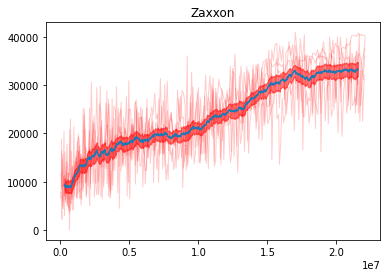

ave time 1.108450286957465


In [3]:
showStatsAfterSims = 0
showStatsAfterSims = 20000000
numberOfEpsToConsider = 10
DOMAINS = [  'Breakout', 'Freeway', 'Qbert', 'Pong', 'Skiing', 'Asteroids', 'Tennis', 'SpaceInvaders']
DOMAINS =['alien', 'amidar', 'assault', 'asterix', 'asteroids', 'atlantis',
    'bank_heist', 'battle_zone', 'beam_rider', 'berzerk', 'bowling', 'boxing', 'breakout',
    'centipede', 'chopper_command', 'crazy_climber', 'demon_attack', 'double_dunk', 'enduro', 'fishing_derby', 'freeway', 'frostbite', 'gopher', 'gravitar',
    'hero', 'ice_hockey', 'jamesbond', 'kangaroo', 'krull', 'kung_fu_master',
    'montezuma_revenge', 'ms_pacman', 'name_this_game', 'phoenix', 'pitfall', 'pong',
    'private_eye', 'qbert', 'riverraid', 'road_runner', 'robotank', 'seaquest', 'skiing',
    'solaris', 'space_invaders', 'star_gunner', 'tennis', 'time_pilot', 'tutankham', 'up_n_down',
    'venture', 'video_pinball', 'wizard_of_wor', 'yars_revenge', 'zaxxon']
trialNums = [0,1,2,3, 4]
novelty_defs = ["classic", "depth"]
learningModes = ["crit"]
RIWClassicRes = {}
RIWClassicVPiRes = {}
RIWDepthRes = {}
RIWDepthVPiRes = {}

RIWClassicResScores = {}
RIWClassicVPiResScores = {}
RIWDepthResScores = {}
RIWDepthVPiResScores = {}
for learningMode in learningModes:
    for novelty_def in novelty_defs:
        totalAveTime = []
        print("novelty: {}, Train V with {} transitions".format(novelty_def, learningMode))
            
        for game in DOMAINS:
            domain = ''.join([g.capitalize() for g in game.split('_')])
            print(domain)
            simCalls = []
            score = []
            timeLearn = []
            timePlan = []
            trained = []
            forPlot = []
            aveScore = []
            aveScorefirstTen = []
            for trial in trialNums:
                with open(os.path.dirname(os.path.realpath(os.getcwd())) + '/results/{}_crit{}_allGames/{}/{}-trial-{}.evaluate'.format(novelty_def, learningMode, domain, domain, trial), 'rb') as input:
                    results = pickle.load(input, encoding='latin1')
                totalSimCalls = 0
                simCalls.append([])
                score.append([])
                timeLearn.append([])
                timePlan.append([])
                trained.append([])
                getStatsAfter = None
                for indx, res in enumerate(results):
                    if getStatsAfter is None and res[5] >= showStatsAfterSims:
                        getStatsAfter = indx
                    simCalls[-1].append(res[5])
                    score[-1].append(res[0])
                    timeLearn[-1].append(res[2])
                    timePlan[-1].append(res[3])
                    trained[-1].append(res[4])
                    forPlot.append((res[5], res[0]))
                resetAt = []
                for indx, didtrained in enumerate(trained[-1]):
                    if didtrained is not None and not didtrained:
                        resetAt.append(simCalls[-1][indx])

                plt.plot(simCalls[-1], score[-1], linewidth=1, alpha=0.2, color='r')
                try:
                    if len(score[-1]) < getStatsAfter+numberOfEpsToConsider+1:
                        print("warning not enough episodes after get stats after")
                        aveScore.append(score[-1][-10:])
                    else:
                        aveScore.append(score[-1][getStatsAfter + 1: getStatsAfter+numberOfEpsToConsider+1])
                        
                except:
                    aveScore.append(score[-1][-10:])
                i = 0
                while simCalls[-1][i] < 1000000 and i < 10:
                    aveScorefirstTen.append(score[-1][i])
                    i += 1
                totalAveTime.append((np.sum(timePlan[-1]) + np.sum(timeLearn[-1]))/(simCalls[-1][-1]/100))
            print(np.average(aveScore))
            if novelty_def == "classic":
                RIWClassicRes[domain] = np.average(aveScorefirstTen)
                RIWClassicResScores[domain] = aveScorefirstTen
                RIWClassicVPiRes[domain] = np.average(aveScore)
                RIWClassicVPiResScores[domain] = aveScore
            else:
                RIWDepthRes[domain] = np.average(aveScorefirstTen)
                RIWDepthResScores[domain] = aveScorefirstTen
                RIWDepthVPiRes[domain] = np.average(aveScore)
                RIWDepthVPiResScores[domain] = aveScore
            def f(some_set):
                return some_set[0]

            forPlot = sorted(forPlot, key=f)
            sim_plot = []
            score_plot = []

            for sim, score in forPlot:
                sim_plot.append(sim)

                score_plot.append(score)

            lineSarsa, lowerSarsa, upperSarsa = getAveragePoints(np.array([sim_plot, score_plot]), 50)
            plt.plot(lineSarsa[0], lineSarsa[1])
            plt.fill_between(lineSarsa[0], lowerSarsa[1], upperSarsa[1], alpha=0.5, color='r')
            plt.title("{}".format(domain))
            plt.show()
        print("ave time {}".format(np.average(totalAveTime)))

Min Action Set, novelty: none, Train V with crit transitions
Alien
6209.0


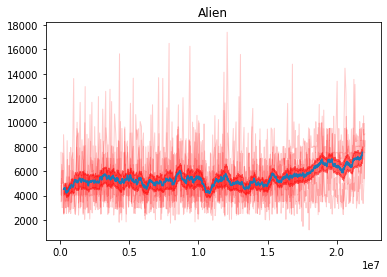

Amidar
1433.68


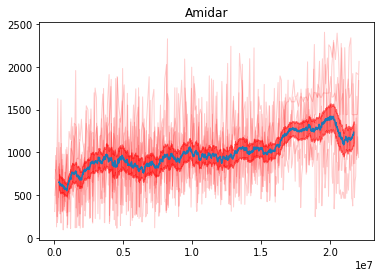

Assault
3222.98


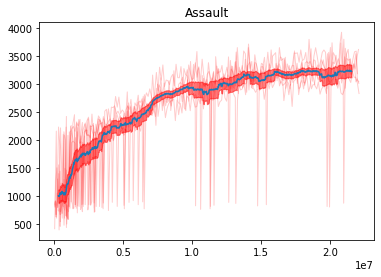

Asterix
39860.0


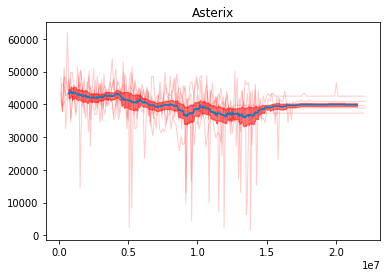

Asteroids
6145.2


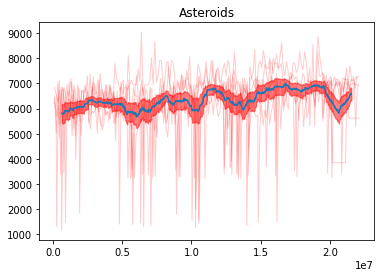

Atlantis
173786.0


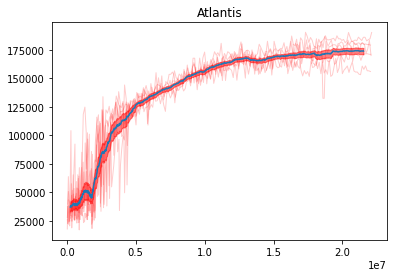

BankHeist
336.4


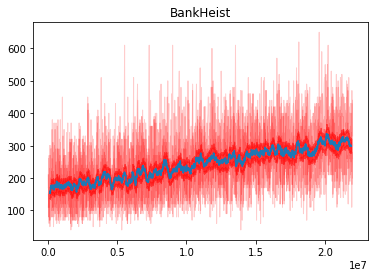

BattleZone
220680.0


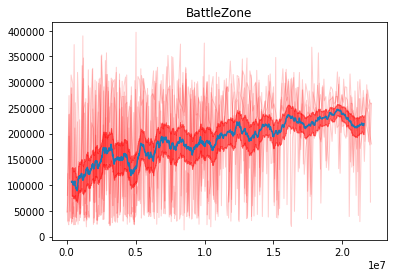

BeamRider
6164.64


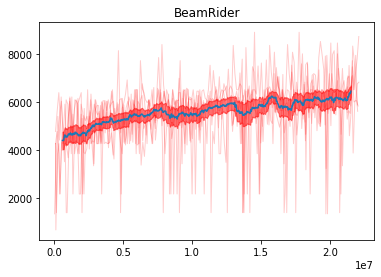

Berzerk
3148.0


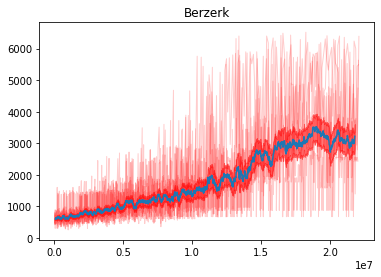

Bowling
161.06


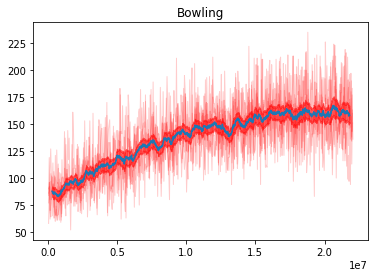

Boxing
80.96


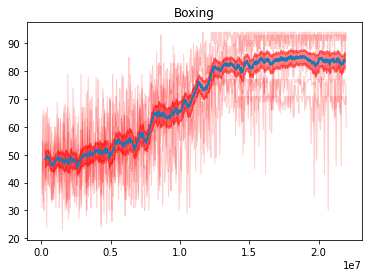

Breakout
197.82


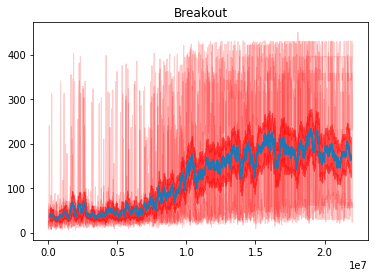

Centipede
53608.8


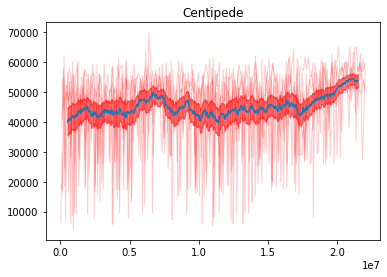

ChopperCommand
17908.0


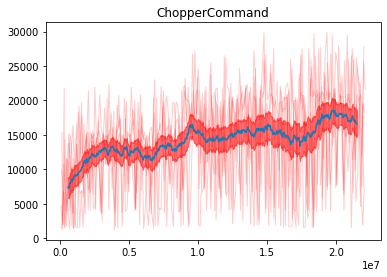

CrazyClimber
78266.0


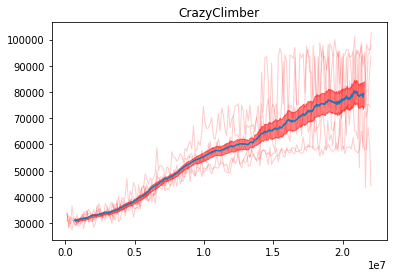

DemonAttack
10560.0


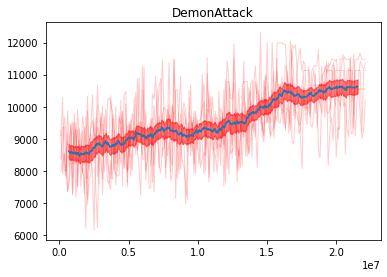

DoubleDunk
19.76


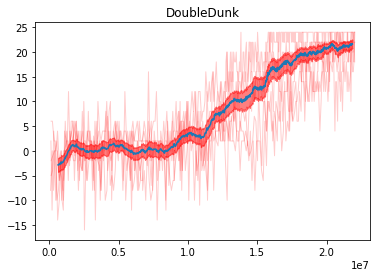

Enduro
231.44


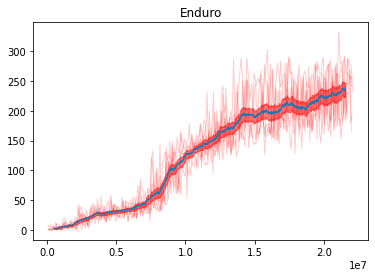

FishingDerby
-23.94


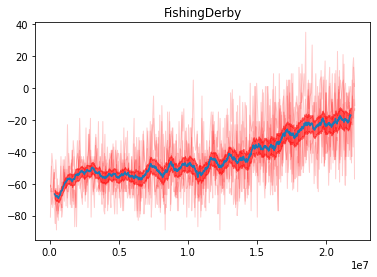

Freeway
28.86


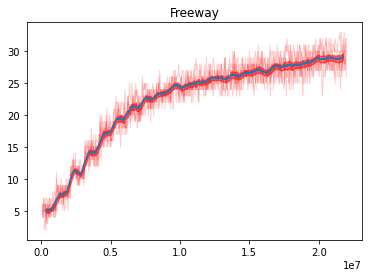

Frostbite
9956.8


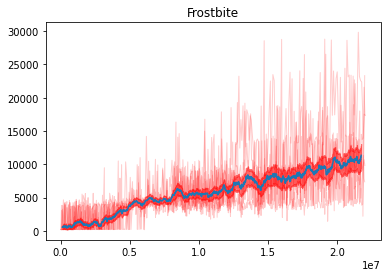

Gopher
11181.6


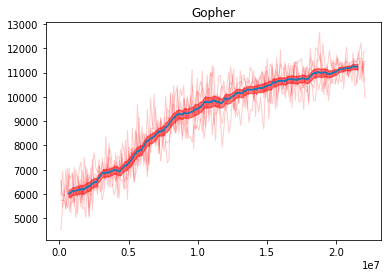

Gravitar
2382.0


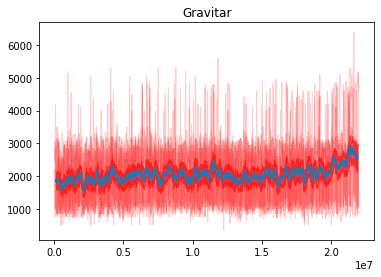

Hero
29200.4


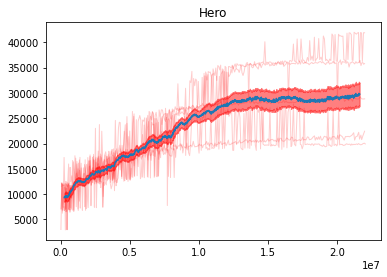

IceHockey
19.62


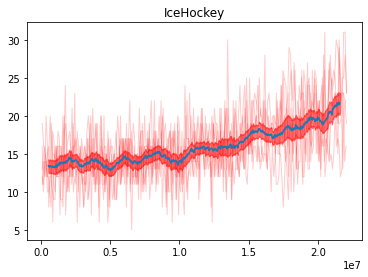

Jamesbond
18666.0


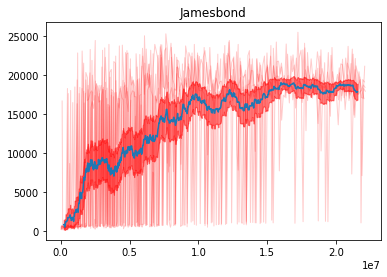

Kangaroo
5332.0


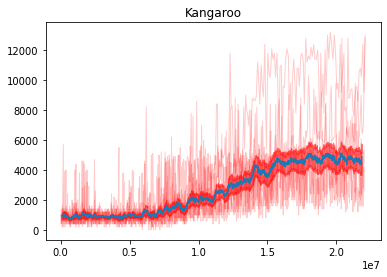

Krull
5631.22


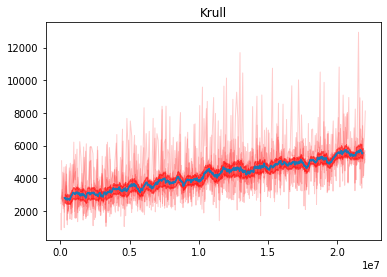

KungFuMaster
27288.0


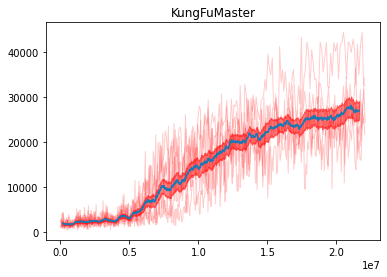

MontezumaRevenge
2.0


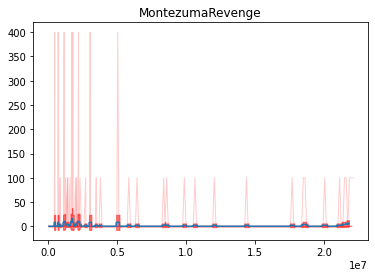

MsPacman
11922.22


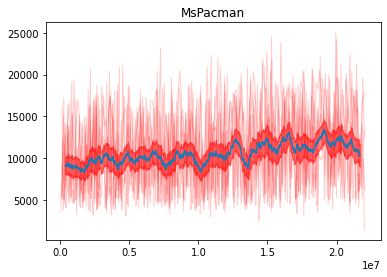

NameThisGame
8287.4


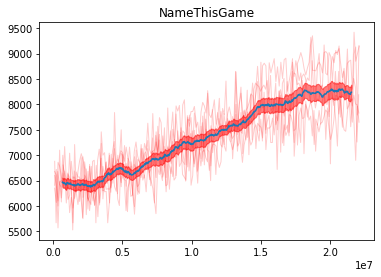

Phoenix
6616.4


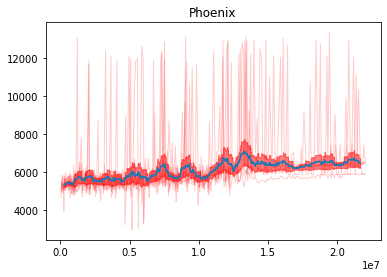

Pitfall
-0.48


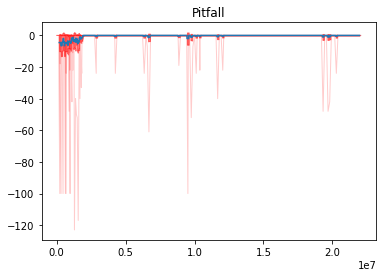

Pong
-12.28


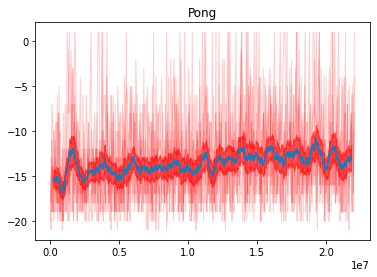

PrivateEye
153.22


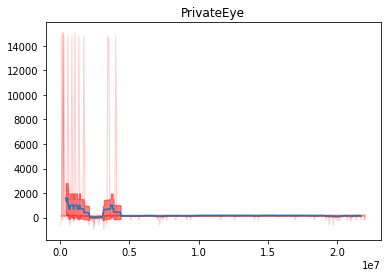

Qbert
28182.5


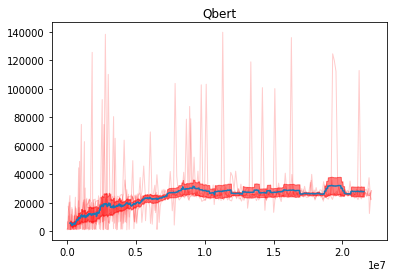

Riverraid
8910.8


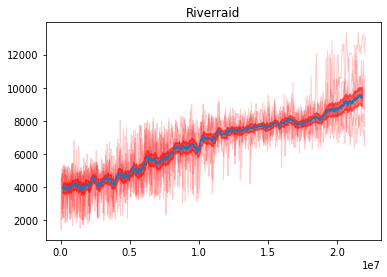

RoadRunner
86650.0


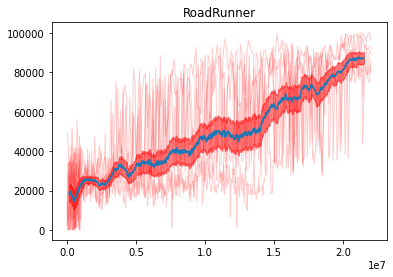

Robotank
31.04


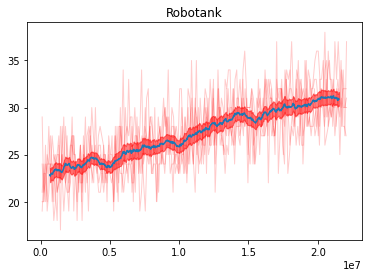

Seaquest
3523.0


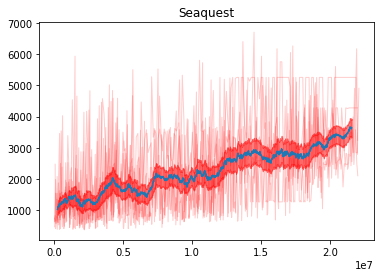

Skiing
-20510.82


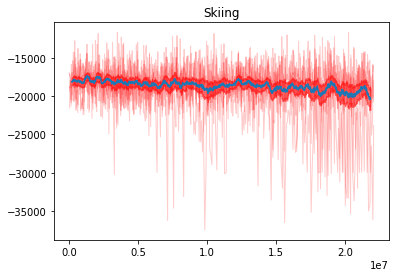

Solaris
7741.6


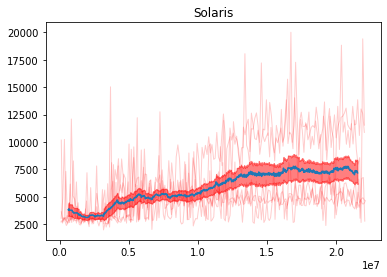

SpaceInvaders
3447.4


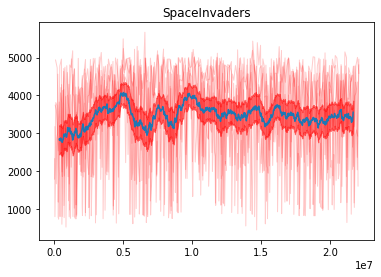

StarGunner
18340.0


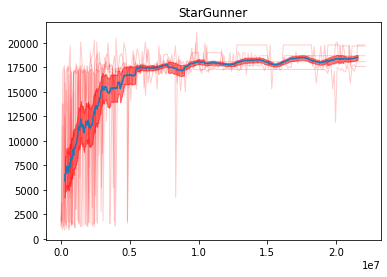

Tennis
-2.8


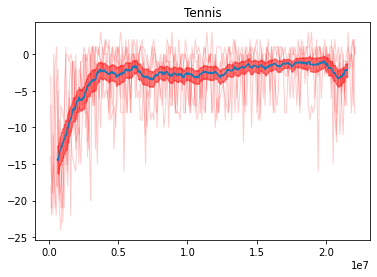

TimePilot
22780.0


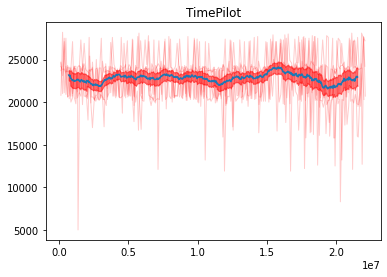

Tutankham
184.94


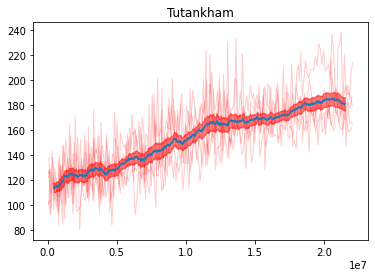

UpNDown
59650.8


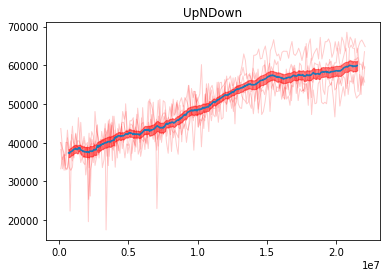

Venture
1732.0


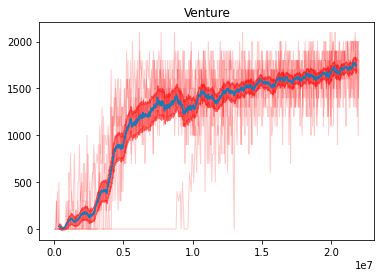

VideoPinball
148995.14


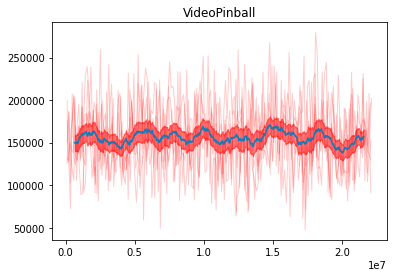

WizardOfWor
54988.0


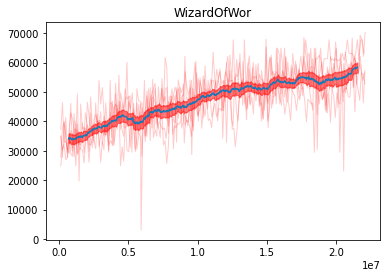

YarsRevenge
133647.42


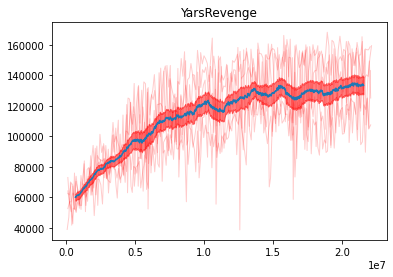

Zaxxon
28102.0


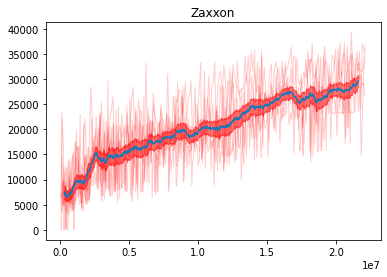

ave time 1.0276027164481736


In [4]:
showStatsAfterSims = 0
showStatsAfterSims = 20000000
numberOfEpsToConsider = 10
DOMAINS = [  'Breakout', 'Freeway', 'Qbert', 'Pong', 'Skiing', 'Asteroids', 'Tennis', 'SpaceInvaders']
DOMAINS =['alien', 'amidar', 'assault', 'asterix', 'asteroids', 'atlantis',
    'bank_heist', 'battle_zone', 'beam_rider', 'berzerk', 'bowling', 'boxing', 'breakout',
    'centipede', 'chopper_command', 'crazy_climber', 'demon_attack', 'double_dunk', 'enduro', 'fishing_derby', 'freeway', 'frostbite', 'gopher', 'gravitar',
    'hero', 'ice_hockey', 'jamesbond', 'kangaroo', 'krull', 'kung_fu_master',
    'montezuma_revenge', 'ms_pacman', 'name_this_game', 'phoenix', 'pitfall', 'pong',
    'private_eye', 'qbert', 'riverraid', 'road_runner', 'robotank', 'seaquest', 'skiing',
    'solaris', 'space_invaders', 'star_gunner', 'tennis', 'time_pilot', 'tutankham', 'up_n_down',
    'venture', 'video_pinball', 'wizard_of_wor', 'yars_revenge', 'zaxxon']
trialNums = [0, 1, 2, 3, 4]
novelty_defs = ["none"]
learningModes = ["crit"]
RIWNoneRes = {}
RIWNoneVPiRes = {}

RIWNoneResScores = {}
RIWNoneVPiResScores = {}
for learningMode in learningModes:
    for novelty_def in novelty_defs:
        totalAveTime = []
        print("Min Action Set, novelty: {}, Train V with {} transitions".format(novelty_def, learningMode))
            
        for game in DOMAINS:
            domain = ''.join([g.capitalize() for g in game.split('_')])
            print(domain)
            simCalls = []
            score = []
            timeLearn = []
            timePlan = []
            trained = []
            forPlot = []
            aveScore = []
            aveScorefirstTen = []
            for trial in trialNums:
        #         if domain == 'Skiing' and trial == 1:
        #             continue
                #try:
                with open(os.path.dirname(os.path.realpath(os.getcwd())) + '/results/{}_crit{}_allGames/{}/{}-trial-{}.evaluate'.format(novelty_def, learningMode, domain, domain, trial), 'rb') as input:
                    results = pickle.load(input, encoding='latin1')
                #print("Trial {}".format(trial))
                totalSimCalls = 0
                simCalls.append([])
                score.append([])
                timeLearn.append([])
                timePlan.append([])
                trained.append([])
                getStatsAfter = None
                #print(len(results))
                for indx, res in enumerate(results):
                    if getStatsAfter is None and res[5] >= showStatsAfterSims:
                        getStatsAfter = indx
                    #print("s {} e {}".format(res[0], res[5]))
                    simCalls[-1].append(res[5])
                    score[-1].append(res[0])
                    timeLearn[-1].append(res[2])
                    timePlan[-1].append(res[3])
                    trained[-1].append(res[4])
                    forPlot.append((res[5], res[0]))
                resetAt = []
                for indx, didtrained in enumerate(trained[-1]):
                    if didtrained is not None and not didtrained:
                        resetAt.append(simCalls[-1][indx])
                #print("Trial {} didn't train at {}".format(trial, resetAt))
                #print(score[-1])
                if simCalls[-1][-1] < 21000000:
                    print("--------------Not finished------------------")
                    print(simCalls[-1][-1])
                #print(simCalls[-1][-1])
                plt.plot(simCalls[-1], score[-1], linewidth=1, alpha=0.2, color='r')
                try:
                    if len(score[-1]) < getStatsAfter+numberOfEpsToConsider+1:
                        print("warning not enough episodes after get stats after")
                        aveScore.append(score[-1][-10:])
                    else:
                        aveScore.append(score[-1][getStatsAfter + 1: getStatsAfter+numberOfEpsToConsider+1])
                        
                except:
                    aveScore.append(score[-1][-10:])
                i = 0
                while simCalls[-1][i] < 1000000 and i < 10:
                    aveScorefirstTen.append(score[-1][i])
                    i += 1
                totalAveTime.append((np.sum(timePlan[-1]) + np.sum(timeLearn[-1]))/(simCalls[-1][-1]/100))
                #assert(simCalls[-1][getStatsAfter+numberOfEpsToConsider] < showStatsAfterSims + 1000000)
                #print(aveScore)
        #         except:
        #             print("error")
            #print(len(aveScore[0]))
            #print(aveScore)
            print(np.average(aveScore))
            RIWNoneRes[domain] = np.average(aveScorefirstTen)
            RIWNoneResScores[domain] = aveScorefirstTen
            RIWNoneVPiRes[domain] = np.average(aveScore)
            RIWNoneVPiResScores[domain] = aveScore
            
            def f(some_set):
                return some_set[0]


            forPlot = sorted(forPlot, key=f)
            sim_plot = []
            score_plot = []

            for sim, score in forPlot:
                sim_plot.append(sim)

                score_plot.append(score)

            lineSarsa, lowerSarsa, upperSarsa = getAveragePoints(np.array([sim_plot, score_plot]), 50)
            plt.plot(lineSarsa[0], lineSarsa[1])
            plt.fill_between(lineSarsa[0], lowerSarsa[1], upperSarsa[1], alpha=0.5, color='r')
            plt.title("{}".format(domain))
            plt.show()
        print("ave time {}".format(np.average(totalAveTime)))

In [5]:
# From junyent et al. ICAPS 21 paper
junyentPiIWPlus = {
 "Alien": 2585.77,
  "Amidar": 374.2,
 "Assault": 922.3,
 "Asterix": 247063.36,
 "Asteroids": 1490.87,
 "Atlantis": 143177.73,
 "BankHeist": 256.29,
 "BattleZone": 30848.95,
 "BeamRider": 8428.96,
 "Berzerk": 960.03,
 "Bowling": 78.18,
 "Boxing": 88.19,
 "Breakout": 107.64,
 "Centipede": 141070.19,
 "ChopperCommand": 3431.74,
 "CrazyClimber": 138648.58,
 "DemonAttack": 35022.64,
 "DoubleDunk": -16.8,
 "Enduro": 63.83,
 "FishingDerby": -28.02,
 #"Freeway": None,
 "Frostbite": 1636.51,
 "Gopher": 7061.76,
 "Gravitar": 1532.33,
 "Hero": 22097.39,
 "IceHockey": -4.02,
 "Jamesbond": 104.91,
 "Kangaroo": 2918.98,
 "Krull": 13014.77,
 "KungFuMaster": 24871.94,
 "MontezumaRevenge": 810.49,
 "MsPacman": 5916.86,
 "NameThisGame": 18167.55,
 "Phoenix": 7647.67,
 "Pitfall": -2.46,
 "Pong": 2.14,
 "PrivateEye": 1766.13,
 "Qbert": 23337.9,
 "RoadRunner": 43813.29,
 "Robotank": 9.68,
 "Seaquest": 559.28,
 "Skiing": -13852.04,
 "Solaris": 1832.93,
 "SpaceInvaders": 1622.49,
 "StarGunner": 1642.82,
 "Tennis": -8.26,
 "TimePilot": 11126.86,
 "Tutankham": 181.44,
 "UpNDown": 59497.75,
 "Venture": 15.68,
 "VideoPinball": 387308.6,
 "WizardOfWor": 30383.68,
 "YarsRevenge": 64544.51,
 "Zaxxon": 10159.01
}

In [6]:
# From junyent et al. ICAPS 21 paper
junyentPiHIW = {
 "Alien": 4609.18,
  "Amidar": 1076.17,
 "Assault": 2344.28,
 "Asterix": 90017.25,
 "Asteroids": 990.95,
 "Atlantis": 17539.22,
 "BankHeist": 501.68,
 "BattleZone": 309137.79,
 "BeamRider": 11931.41,
 "Berzerk": 7417.26,
 "Bowling": 50.09,
 "Boxing": 6.81,
 "Breakout": 252.88,
 "Centipede": 80685.48,
 "ChopperCommand": 70787.12,
 "CrazyClimber": 102205.99,
 "DemonAttack": 16007.64,
 "DoubleDunk": 3.51,
 "Enduro": 44.47,
 "FishingDerby": -53.76,
 #"Freeway": None,
 "Frostbite": 7242.6,
 "Gopher": 15001.18,
 "Gravitar": 1154.01,
 "Hero": 36231.21,
 "IceHockey": -2.36,
 "Jamesbond": 1380.13,
 "Kangaroo": 6861.57,
 "Krull": 4121.81,
 "KungFuMaster": 20680.65,
 "MontezumaRevenge": 5275.89,
 "MsPacman": 4523.47,
 "NameThisGame": 9977.12,
 "Phoenix": 7508.63,
 "Pitfall": -128.82,
 "Pong": -9.70,
 "PrivateEye": 29548.76,
 "Qbert": 40449.72,
 "RoadRunner": 87953.53,
 "Robotank": 10.63,
 "Seaquest": 867.51,
 "Skiing": -15417.86,
 "Solaris": 3524.69,
 "SpaceInvaders": 2946.18,
 "StarGunner": 1864.64,
 "Tennis": -20,
 "TimePilot": 34610.25,
 "Tutankham": 199.06,
 "UpNDown": 80991.07,
 "Venture": 10.73,
 "VideoPinball": 184720.01,
 "WizardOfWor": 12027.43,
 "YarsRevenge": 159496.2,
 "Zaxxon": 21135.58
}

In [7]:
# From junyent et al. ICAPS 21 paper
junyentPiIW20M = {
 "Alien": 3969.78,
  "Amidar": 950.45,
 "Assault": 1574.91,
 "Asterix": 346409.11,
 "Asteroids": 1368.55,
 "Atlantis": 106212.63,
 "BankHeist": 567.16,
 "BattleZone": 69659.4,
 "BeamRider": 3313.11,
 "Berzerk": 1548.23,
 "Bowling": 26.28,
 "Boxing": 99.88,
 "Breakout": 92.07,
 "Centipede": 126488.35,
 "ChopperCommand": 11187.44,
 "CrazyClimber": 161192.01,
 "DemonAttack": 26881.13,
 "DoubleDunk": 4.68,
 "Enduro": 506.59,
 "FishingDerby": 8.89,
 #"Freeway": None,
 "Frostbite": 270,
 "Gopher": 18025.91,
 "Gravitar": 1876.8,
 "Hero": 36443.73,
 "IceHockey": -9.66,
 "Jamesbond": 43.2,
 "Kangaroo": 1847.46,
 "Krull": 8343.3,
 "KungFuMaster": 41609.03,
 "MontezumaRevenge": 0,
 "MsPacman": 14726.33,
 "NameThisGame": 12734.85,
 "Phoenix": 5905.12,
 "Pitfall": -214.75,
 "Pong": -20.42,
 "PrivateEye": 452.4,
 "Qbert": 32529.6,
 "RoadRunner": 38764.81,
 "Robotank": 15.66,
 "Seaquest": 5916.05,
 "Skiing": -19188.32,
 "Solaris": 3048.78,
 "SpaceInvaders": 2694.09,
 "StarGunner": 1381.24,
 "Tennis": -23.67,
 "TimePilot": 16099.92,
 "Tutankham": 216.67,
 "UpNDown": 107757.51,
 "Venture": 0,
 "VideoPinball": 514012.51,
 "WizardOfWor": 76533.18,
 "YarsRevenge": 102183.67,
 "Zaxxon": 22905.73
}

In [8]:
# From rainbow paper
rainbow = {
 "Alien": 6022.9,
 "Amidar": 202.8,
 "Assault": 14491.7,
 "Asterix": 280114,
 "Asteroids": 2249.4,
 "Atlantis": 814684,
 "BankHeist": 826,
 "BattleZone": 52040,
 "BeamRider": 21768.5,
 "Berzerk": 1793.4,
 "Bowling": 39.4,
 "Boxing": 54.9,
 "Breakout": 379.5,
 "Centipede": 7160.9,
 "ChopperCommand": 10916,
 "CrazyClimber": 143962,
 "DemonAttack": 109670.7,
 "DoubleDunk": -0.6,
 "Enduro": 2061.1,
 "FishingDerby": 22.6,
 "Freeway": 29.1,
 "Frostbite": 4141.1,
 "Gopher": 72595.7,
 "Gravitar": 567.5,
 "Hero": 50496.8,
 "IceHockey": -0.7,
 "Kangaroo": 10841,
 "Krull": 6715.5,
 "KungFuMaster": 28999.8,
 "MontezumaRevenge": 154,
 "MsPacman": 2570.2,
 "NameThisGame": 11686.5,
 "Phoenix": 103061.6,
 "Pitfall": -37.6,
 "Pong": 19,
 "PrivateEye": 1704.4,
 "Qbert": 18397.6,
 "RoadRunner": 54261,
 "Robotank": 55.2,
 "Seaquest": 19176,
 "Skiing": -11685.8,
 "Solaris": 2860.7,
 "SpaceInvaders": 12629,
 "StarGunner": 123853,
 "Tennis": -2.2,
 "TimePilot": 11190.5,
 "Tutankham": 126.9,
 "Venture": 45,
 "VideoPinball": 506817.2,
 "WizardOfWor": 14631.5,
 "YarsRevenge": 93007.9,
 "Zaxxon": 19658
}

In [9]:
# From nature Mnih 2015
human = {
 "Alien": 6875,
  "Amidar": 1676,
 "Assault": 1496,
 "Asterix": 8503,
 "Asteroids": 13157,
 "Atlantis": 29028,
 "BankHeist": 734.4,
 "BattleZone": 37800,
 "BeamRider": 5775,
 "Berzerk": None,
 "Bowling": 154.8,
 "Boxing": 4.3,
 "Breakout": 31.8,
 "Centipede": 11963,
 "ChopperCommand": 9882,
 "CrazyClimber": 35411,
 "DemonAttack": 3401,
 "DoubleDunk": -15.5,
 "Enduro": 309.6,
 "FishingDerby": 5.5,
 "Freeway": 29.6,
 "Frostbite": 4335,
 "Gopher": 2321,
 "Gravitar": 2672,
 "Hero": 25763,
 "IceHockey": 0.9,
 "Jamesbond": 406.7,
 "Kangaroo": 3035,
 "Krull": 2395,
 "KungFuMaster": 22736,
 "MontezumaRevenge": 4367,
 "MsPacman": 15693,
 "NameThisGame": 4076,
 "Phoenix": None,
 "Pitfall": None,
 "Pong": 9.3,
 "PrivateEye": 69571,
 "Qbert": 16455,
    "Riverraid": 13513,
 "RoadRunner": 7845,
 "Robotank": 11.9,
 "Seaquest": 20182,
 "Skiing": None,
 "Solaris": None,
 "SpaceInvaders": 1652,
 "StarGunner": 10250,
 "Tennis": -8.9,
 "TimePilot": 5925,
 "Tutankham": 167.6,
 "UpNDown": 9082,
 "Venture": 1188,
 "VideoPinball": 17298,
 "WizardOfWor": 4757,
 "YarsRevenge": None,
 "Zaxxon": 9173
}

In [31]:
# From nature Mnih 2015
DQN = {
 "Alien": 3069,
  "Amidar": 739.5,
 "Assault": 3359,
 "Asterix": 6012,
 "Asteroids": 1629,
 "Atlantis": 85641,
 "BankHeist": 429.7,
 "BattleZone": 26300,
 "BeamRider": 6846,
 "Berzerk": None,
 "Bowling": 42.4,
 "Boxing": 71.8,
 "Breakout": 401.2,
 "Centipede": 8309,
 "ChopperCommand": 6687,
 "CrazyClimber": 114103,
 "DemonAttack": 9711,
 "DoubleDunk": -18.1,
 "Enduro": 301.8,
 "FishingDerby": -0.8,
 "Freeway": 30.3,
 "Frostbite": 328.3,
 "Gopher": 8520,
 "Gravitar": 306.7,
 "Hero": 19950,
 "IceHockey": -1.6,
 "Jamesbond": 576.7,
 "Kangaroo": 6740,
 "Krull": 3805,
 "KungFuMaster": 23270,
 "MontezumaRevenge": 0,
 "MsPacman": 2311,
 "NameThisGame": 7257,
 "Phoenix": None,
 "Pitfall": None,
 "Pong": 18.9,
 "PrivateEye": 1788,
 "Qbert": 10596,
    "Riverraid": 8316,
 "RoadRunner": 18257,
 "Robotank": 51.6,
 "Seaquest": 5286,
 "Skiing": None,
 "Solaris": None,
 "SpaceInvaders": 1976,
 "StarGunner": 57997,
 "Tennis": -2.5,
 "TimePilot": 5947,
 "Tutankham": 186.7,
 "UpNDown": 8456,
 "Venture": 380,
 "VideoPinball": 42684,
 "WizardOfWor": 3393,
 "YarsRevenge": None,
 "Zaxxon": 4977
}

In [32]:
# From rainbow paper
rainbow = {
 "Alien": 6022.9,
 "Amidar": 202.8,
 "Assault": 14491.7,
 "Asterix": 280114,
 "Asteroids": 2249.4,
 "Atlantis": 814684,
 "BankHeist": 826,
 "BattleZone": 52040,
 "BeamRider": 21768.5,
 "Berzerk": 1793.4,
 "Bowling": 39.4,
 "Boxing": 54.9,
 "Breakout": 379.5,
 "Centipede": 7160.9,
 "ChopperCommand": 10916,
 "CrazyClimber": 143962,
 "DemonAttack": 109670.7,
 "DoubleDunk": -0.6,
 "Enduro": 2061.1,
 "FishingDerby": 22.6,
 "Freeway": 29.1,
 "Frostbite": 4141.1,
 "Gopher": 72595.7,
 "Gravitar": 567.5,
 "Hero": 50496.8,
 "IceHockey": -0.7,
 "Kangaroo": 10841,
 "Krull": 6715.5,
 "KungFuMaster": 28999.8,
 "MontezumaRevenge": 154,
 "MsPacman": 2570.2,
 "NameThisGame": 11686.5,
 "Phoenix": 103061.6,
 "Pitfall": -37.6,
 "Pong": 19,
 "PrivateEye": 1704.4,
 "Qbert": 18397.6,
 "RoadRunner": 54261,
 "Robotank": 55.2,
 "Seaquest": 19176,
 "Skiing": -11685.8,
 "Solaris": 2860.7,
 "SpaceInvaders": 12629,
 "StarGunner": 123853,
 "Tennis": -2.2,
 "TimePilot": 11190.5,
 "Tutankham": 126.9,
 "Venture": 45,
 "VideoPinball": 506817.2,
 "WizardOfWor": 14631.5,
 "YarsRevenge": 93007.9,
 "Zaxxon": 19658
}

In [11]:
# Branching Factor
BranchingFactor = {
 "Alien": 18,
 "Amidar": 10,
 "Assault": 7,
 "Asterix": 9,
 "Asteroids": 14,
 "Atlantis": 4,
 "BankHeist": 18,
 "BattleZone": 18,
 "BeamRider": 9,
 "Berzerk": 18,
 "Bowling": 6,
 "Boxing": 18,
 "Breakout": 4,
 "Centipede": 18,
 "ChopperCommand": 18,
 "CrazyClimber": 9,
 "DemonAttack": 6,
 "DoubleDunk": 18,
 "Enduro": 9,
 "FishingDerby": 18,
 "Freeway": 3,
 "Frostbite": 18,
 "Gopher": 8,
 "Gravitar": 18,
 "Hero": 18,
 "IceHockey": 18,
 "Jamesbond": 18,
 "Kangaroo": 18,
 "Krull": 18,
 "KungFuMaster": 14,
 "MontezumaRevenge": 18,
 "MsPacman": 9,
 "NameThisGame": 6,
 "Phoenix": 8,
 "Pitfall": 18,
 "Pong": 6,
 "PrivateEye": 18,
 "Qbert": 6,
 "RoadRunner": 18,
 "Robotank": 18,
 "Seaquest": 18,
 "Skiing": 3,
 "Solaris": 18,
 "SpaceInvaders": 6,
 "StarGunner": 18,
 "Tennis": 18,
 "TimePilot": 10,
 "Tutankham": 8,
 "UpNDown": 6,
 "Venture": 18,
 "VideoPinball": 9,
 "WizardOfWor": 10,
 "YarsRevenge": 18,
 "Zaxxon":  18
}

In [27]:
muZero = {
 "Alien": 741812.63,
 "Amidar": 28634.39,
 "Assault": 143972.03,
 "Asterix": 998425,
 "Asteroids": 678558.64,
 "Atlantis": 1674767.2,
 "BankHeist": 1278.98,
 "BattleZone": 848623,
 "BeamRider": 454993.53,
 "Berzerk": 85932.6,
 "Bowling": 260.13,
 "Boxing": 100,
 "Breakout": 864,
 "Centipede": 1159043.27,
 "ChopperCommand": 991039.7,
 "CrazyClimber": 458315.4,
 "DemonAttack": 839642.95,
 "DoubleDunk": 23.94,
 "Enduro": 2382.44,
 "FishingDerby": 91.16,
 "Freeway": 33.03,
 "Frostbite": 631378.53,
 "Gopher": 130345.58,
 "Gravitar": 6682.7,
 "Hero": 49244.11,
 "IceHockey": 67.04,
 "Jamesbond": 41063.25,
 "Kangaroo": 16763.6,
 "Krull": 269358.27,
 "KungFuMaster": 204824,
 "MontezumaRevenge": 0,
 "MsPacman": 243401.1,
 "NameThisGame": 157177.85,
 "Phoenix": 955137.84,
 "Pitfall": 0,
 "Pong": 21,
 "PrivateEye": 15299.98,
 "Qbert": 72276,
 "RoadRunner": 613411.8,
 "Robotank": 131.13,
 "Seaquest": 999976.52,
 "Skiing": -29968.36,
 "Solaris": 56.62,
 "SpaceInvaders": 74335.3,
 "StarGunner": 549271.7,
 "Tennis": 0,
 "TimePilot": 476763.9,
 "Tutankham": 491.48,
 "UpNDown": 715545.61,
 "Venture": 0.4,
 "VideoPinball": 981791.88,
 "WizardOfWor": 197726,
 "YarsRevenge": 553311.46,
 "Zaxxon": 725853.9
}

In [12]:
sparseDomains = ["Bowling",
"Enduro",
"Freeway",
"Gopher",
"Jamesbond",
"MontezumaRevenge",
"Pitfall",
"PrivateEye",
"RoadRunner",
"Skiing",
"Solaris",
"Venture",
"Zaxxon"]


In [13]:
from scipy.stats import ttest_ind

In [57]:
import pandas as pd

comparisonTable = {}
Algs = ["RIW-Depth", "RIW-Classic", "RIW-Depth+V+pi", "RIW-Classic+V+pi", "RIW-None+V+pi", "piIW", "Junyent plus", "Junyent piHIW"]
AlgResults = {"RIW-Depth": RIWDepthRes, "RIW-Classic": RIWClassicRes, "RIW-Depth+V+pi": RIWDepthVPiRes, "RIW-Classic+V+pi": RIWClassicVPiRes, "RIW-None+V+pi": RIWNoneVPiRes, "piIW": junyentPiIW20M, "Junyent plus": junyentPiIWPlus, "Junyent piHIW": junyentPiHIW}
for alg in Algs:
    compareRow = []
    total = 0
    for algCompare in Algs:
        if alg == algCompare:
            compareRow.append(None)
        else:
            timesBetter = 0
            noAlgs = 0
            for key, value in junyentPiHIW.items():
                #if key in DQN.keys() and key in rainbow.keys():
                if key in sparseDomains:
                #if BranchingFactor[key] >= 10:
                    noAlgs += 1
#                 print(alg)
#                 print(algCompare)
#                 print(key)
                if AlgResults[alg][key] > AlgResults[algCompare][key]:
                    if key in sparseDomains:
                    #if BranchingFactor[key] >= 10:
                        #if BranchingFactor[key] >= 10:
                        timesBetter += 1
            compareRow.append(timesBetter)
            total += timesBetter
            #print("Alg {} is better {} times then alg {}.".format(alg, timesBetter, algCompare))
    compareRow.append(total)
    comparisonTable[alg] = compareRow

df = pd.DataFrame(comparisonTable)
print(noAlgs)
print(df)


12
   RIW-Depth  RIW-Classic  RIW-Depth+V+pi  RIW-Classic+V+pi  RIW-None+V+pi  \
0        NaN          6.0             9.0              10.0           11.0   
1        5.0          NaN             9.0              10.0           11.0   
2        2.0          2.0             NaN               7.0            9.0   
3        1.0          1.0             4.0               NaN            7.0   
4        1.0          1.0             3.0               5.0            NaN   
5        6.0          6.0             7.0               7.0            8.0   
6        3.0          3.0             9.0               9.0            9.0   
7        4.0          4.0             6.0               7.0            7.0   
8       22.0         23.0            47.0              55.0           62.0   

   piIW  Junyent plus  Junyent piHIW  
0   5.0           9.0            8.0  
1   5.0           9.0            8.0  
2   4.0           3.0            6.0  
3   4.0           3.0            5.0  
4   4.0           3.0

In [54]:
df.to_excel("sparseDomains.xls")



In [87]:
from scipy.stats import ttest_ind
Algs = ["RIW-Depth", "RIW-Classic", "RIW-None+V+pi", "RIW-Depth+V+pi", "RIW-Classic+V+pi"]
AlgResults = {"RIW-Depth": RIWDepthResScores, "RIW-Classic": RIWClassicResScores, "RIW-None+V+pi": RIWNoneVPiResScores, "RIW-Depth+V+pi": RIWDepthVPiResScores, "RIW-Classic+V+pi": RIWClassicVPiResScores}

for alg in Algs:
    print(alg)
    for key in RIWClassicRes.keys():
#         print(np.array(RIWClassicVPiResScores[key]).flatten())
        mean, lower, upper = mean_confidence_interval(np.array(AlgResults[alg][key]).flatten(), 0.9)
#        print(mean)
#        print(upper - mean)
        isBest = True
        for algCompare in Algs:
            if alg != algCompare:
                #rint(algCompare)
                t, p = ttest_ind(np.array(AlgResults[alg][key]).flatten(), np.array(AlgResults[algCompare][key]).flatten(), equal_var=False)
#                 print(np.array(AlgResults[alg][key]).flatten())
#                 print(np.array(AlgResults[algCompare][key]).flatten())
                if not(t > 0 and p < 0.1):
                    isBest = False
        
#         if isBest:
#             print(key)
#             #print(alg)
#             print(mean)
#             print(upper - mean)
#             #print(1)
        print(key)
        print("{:,.2f}".format(mean))
#         print("{:,.2f}$\pm${:,.2f}".format(mean, upper - mean))

RIW-Depth
Alien
4,365.20
Amidar
1,014.84
Assault
764.80
Asterix
52,940.00
Asteroids
1,480.20
Atlantis
48,930.00
BankHeist
453.46
BattleZone
102,780.00
BeamRider
4,124.37
Berzerk
600.00
Bowling
65.38
Boxing
52.44
Breakout
64.34
Centipede
52,685.12
ChopperCommand
3,768.00
CrazyClimber
40,520.00
DemonAttack
8,499.88
DoubleDunk
6.72
Enduro
1.90
FishingDerby
-67.76
Freeway
5.50
Frostbite
280.00
Gopher
6,311.43
Gravitar
1,755.00
Hero
17,438.30
IceHockey
21.48
Jamesbond
2,378.00
Kangaroo
1,556.00
Krull
2,176.58
KungFuMaster
5,668.00
MontezumaRevenge
0.00
MsPacman
15,697.56
NameThisGame
6,247.50
Phoenix
4,992.80
Pitfall
-44.86
Pong
-4.52
PrivateEye
625.72
Qbert
4,499.50
Riverraid
7,558.20
RoadRunner
17,326.00
Robotank
31.02
Seaquest
1,609.60
Skiing
-31,013.00
Solaris
3,110.00
SpaceInvaders
2,592.40
StarGunner
17,510.00
Tennis
1.40
TimePilot
24,455.00
Tutankham
159.40
UpNDown
39,834.00
Venture
22.00
VideoPinball
136,531.50
WizardOfWor
26,956.25
YarsRevenge
59,779.47
Zaxxon
9,342.00
RIW-Classic


/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2023: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/student.unimelb.edu.au/stefan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


[[38300.0,
  30500.0,
  38700.0,
  35900.0,
  39800.0,
  37300.0,
  39800.0,
  33000.0,
  40800.0,
  40800.0],
 [37500.0,
  37500.0,
  38000.0,
  38700.0,
  36200.0,
  37500.0,
  36000.0,
  37500.0,
  36300.0,
  36300.0],
 [25200.0,
  25200.0,
  26100.0,
  24900.0,
  24900.0,
  25700.0,
  24900.0,
  25200.0,
  25200.0,
  25200.0],
 [24700.0,
  31800.0,
  30900.0,
  39400.0,
  37800.0,
  36400.0,
  37000.0,
  37000.0,
  28700.0,
  36500.0],
 [24100.0,
  22400.0,
  19200.0,
  18900.0,
  22400.0,
  19200.0,
  18900.0,
  18900.0,
  18900.0,
  18900.0]]